# Tutorial 1 Task - Diabetes

### Task:
We provided a diabetes.csv data set (https://www.kaggle.com/uciml/pima-indians-diabetes-database) on Moodle. 

***
Use this dataset and classify the patients based on the feature 'Outcome'. 
O means no diabetes and 1 means diabetes.
***
Apply kNN classification model and calculate R2 (coefficient of determination) value for the prediction.

***
Useful Kaggle workbooks to consult:
1. https://www.kaggle.com/code/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed
2. https://www.kaggle.com/code/pouryaayria/a-complete-ml-pipeline-tutorial-acu-86
***

### Import packages & load data

In [1]:
# Import relevant packages & datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

# Suppress warning messages
import warnings
warnings.filterwarnings('ignore')

# Set the display.max_columns option to None to display all columns of the df
pd.set_option('display.max_columns', None)

In [2]:
# Read files from the github url into the pandas df
df = pd.read_csv('diabetes.csv')

# Return the first 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Initial data exploration

In [3]:
# Print the dimensionality of the df
df.shape

(768, 9)

In [4]:
# Print a concise summary of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Generate descriptive statistics for numerical attributes
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Data cleaning & transformation

### Analyse diabetes data

<Axes: >

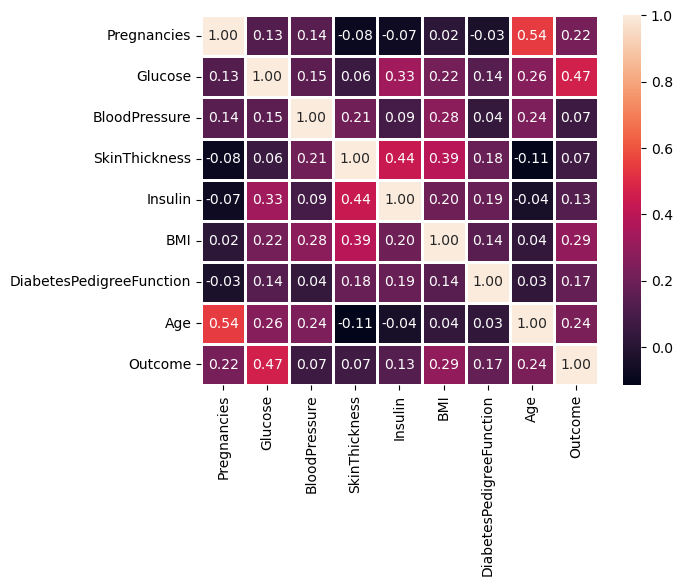

In [6]:
# Generates heatmap of dataset's correlation matrix with annotations and specified linewidths
sns.heatmap(df.corr(), annot = True, fmt = '.2f', linewidths = 2)

In [7]:
# Create the independent and dependent variables
x = df.drop('Outcome', axis = 1).values
y = df['Outcome'].values

In [8]:
# Train-Test Split
# Stratify=y: Ensures the class distribution is the same in both train and test sets
train_data, test_data, train_label, test_label = train_test_split(x, y, test_size = 0.2, random_state = 28, stratify = y)

In [9]:
# Print the shape of training and testing data along with its labels.
# train_label has 0.8 or 80% of the values
# test_label has 0.2 or 20% of the values

train_data.shape, train_label.shape, test_data.shape, test_label.shape

((614, 8), (614,), (154, 8), (154,))

In [18]:
neighbors = np.arange(1, 10)                  # number of neighbors
train_accuracy = np.zeros(len(neighbors))    # Declare and initialise the matrix
test_accuracy = np.zeros(len(neighbors))     # Declare and initialise the matrix

In [19]:
for i,k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 9
    knn = KNeighborsClassifier(n_neighbors = k)           # Initialise an object knn using KNeighborsClassifier method

    #Fit the model
    knn.fit(train_data, train_label)                      # Call fit method to implement the ML KNeighborsClassifier model

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_data, train_label)   # Save the score value in the train_accuracy array

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(test_data, test_label)      # Save the score value in the train_accuracy array

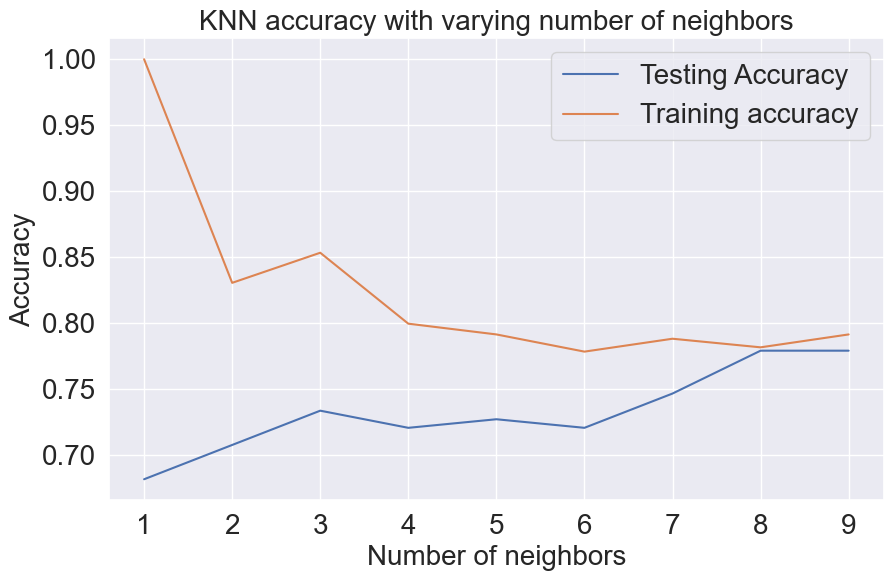

In [20]:
# Delcare the size of the array
plt.figure(figsize = (10, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop = {'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

It looks like 35 neighbours provides us with roughly 0.75 accuracy

In [23]:
# Declare and initialise an object 'KNeighborsClassifier' with 3 neighbors
knn = KNeighborsClassifier(n_neighbors = 8)

# Fit the model
knn.fit(train_data, train_label)

# Compute accuracy on the training set
train_accuracy = knn.score(train_data, train_label)

# Compute accuracy on the test set
test_accuracy = knn.score(test_data, test_label)

In [24]:
# Display the test accuracy
print(test_accuracy)

0.7792207792207793


In [25]:
# import library for confusion matrix
from sklearn.metrics import confusion_matrix

# Predict the results by calling a method 'predict()'
prediction = knn.predict(test_data)

# Display the confusion matrix
confusion_matrix(test_label, prediction)

array([[96,  4],
       [30, 24]], dtype=int64)

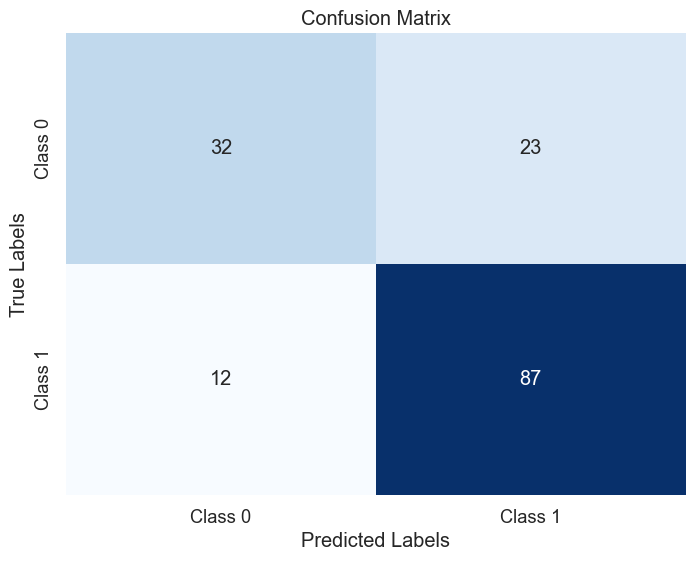

In [26]:
# Your confusion matrix
conf_matrix = np.array([[32, 23],
                        [12, 87]])

# Create labels for the classes
class_names = ['Class 0', 'Class 1']

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [27]:
# Display the report
print(classification_report(test_label, prediction))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85       100
           1       0.86      0.44      0.59        54

    accuracy                           0.78       154
   macro avg       0.81      0.70      0.72       154
weighted avg       0.80      0.78      0.76       154



Displaying the Report: The classification_report function takes in two arguments: the true labels (test_label) and the predicted labels (prediction). It then prints a detailed classification report.

Output Explanation
The output of classification_report will contain the following metrics for each class, as well as averaged metrics:

1. Precision: The ratio of True Positives to the sum of True Positives and False Positives.
2. The ratio of True Positives to the sum of True Positives and False Negatives.
3. F1-Score: The weighted harmonic mean of precision and recall.
4. Support: The number of actual occurrences of the class in the dataset.